In [2]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [3]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

No joblib
no cmocean


In [4]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = pf.cm.viridis
# choose simulation
runid='Arc12'
# choose depth
get3d = False
# variable ID
var_id= 'tr18'

########################

# AUTOMATIC DEFINITION OF PATHS
#resultpath = '/scratch/usr/hbkoziel/'+runid+'/netcdf/'
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'


# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [5]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=False)

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [6]:
mesh


FESOM mesh:
path                  = /gfs2/work/hbkvsk12/mesh/meshArc4.5
alpha, beta, gamma    = 50, 15, -90
number of 2d nodes    = 753179
number of 2d elements = 1480268
number of 3d nodes    = 16950142

        

In [7]:
year = 1997
mo = 2

In [8]:
if mo ==0: 
    dayind = (range(0,15))
    month='JAN'
elif mo ==1: 
    dayind = (range(15,30))
    month='FEV'
elif mo ==2: 
    dayind = (range(30,45))
    month='MAR'
elif mo ==3: 
    dayind = (range(45,60))
    month='APR'
elif mo ==4: 
    dayind = (range(60,75))
    month='MAY'
elif mo ==5: 
    dayind = (range(75,90))
    month='JUN'
elif mo ==6: 
    dayind = (range(90,105))
    month='JUL'
elif mo ==7:
    dayind = (range(105,120))
    month='AUG'
elif mo ==8: 
    dayind = (range(120,135))
    month='SEP'
elif mo ==9: 
    dayind = (range(135,150))
    month='OCT'
elif mo ==10: 
    dayind = (range(150,165))
    month='NOV'
elif mo ==11: 
    dayind = (range(165,167))
    month='DEC'

In [9]:
# loop over years

print year
print month
ncfile = resultpath+runid+'.'+str(year)+'.oce.mean.nc'
print ncfile
f      = Dataset(ncfile, 'r')
if year<2000:
    data2, elem_no_nan = pf.get_data(f.variables[var_id][mo,:],mesh,0)
else:
    data2, elem_no_nan = pf.get_data(f.variables[var_id][dayind,:].mean(axis=0),mesh,0)

data2=np.copy(data2)
print 'Number of nans in tracer: ',np.count_nonzero(np.isnan(data2))
print 'Number of inf in tracer: ',np.count_nonzero(np.isinf(data2))
print 'Mean of surface: ',np.mean(data2)
print 'Max and min: ',np.max(data2),np.min(data2)

1997
MAR
/scratch/usr/hbkvsk12/hlrn3_work2/results/Arc12/Oldfiles/Arc12.1997.oce.mean.nc
For depth 0 model level -0.0 will be used
Number of nans in tracer:  0
Number of inf in tracer:  0
Mean of surface:  4.484924459010354
Max and min:  32475.412109375 0.0007287492044270039


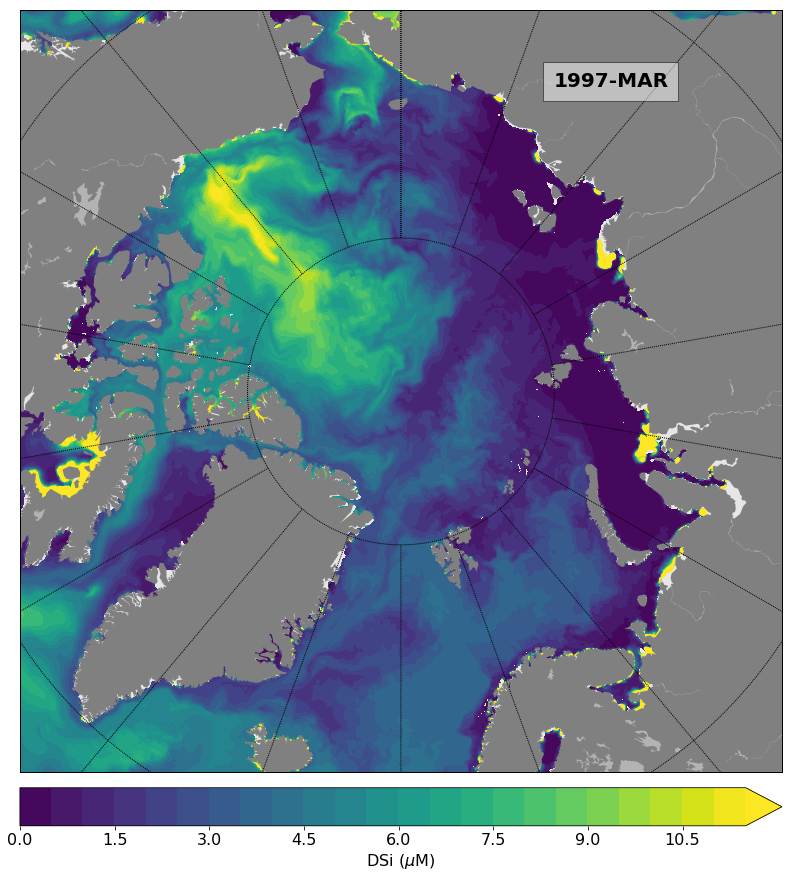

In [10]:
contours = np.arange(0, 12, .5)

fig = plt.figure(figsize=(15, 15), facecolor='w', edgecolor='k')
#fig.suptitle('Density (kg m$^{-3}$)')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)

m = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')

#eps=(contours.max()-contours.min())/100.
#data2[data2<=contours.min()]=contours.min()+eps
#data2[data2>=contours.max()]=contours.max()-eps

im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap, extend='max')
plt.annotate(str(year)+'-'+month, xy=(0.7, 0.9), xycoords='axes fraction', fontsize = 20,
             fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

label = 'DSi ($\mu$M)'
#plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16) 

#plt.savefig(saving_directory+'ChlNano.png', dpi = 200, bbox_inches='tight')
plt.show()

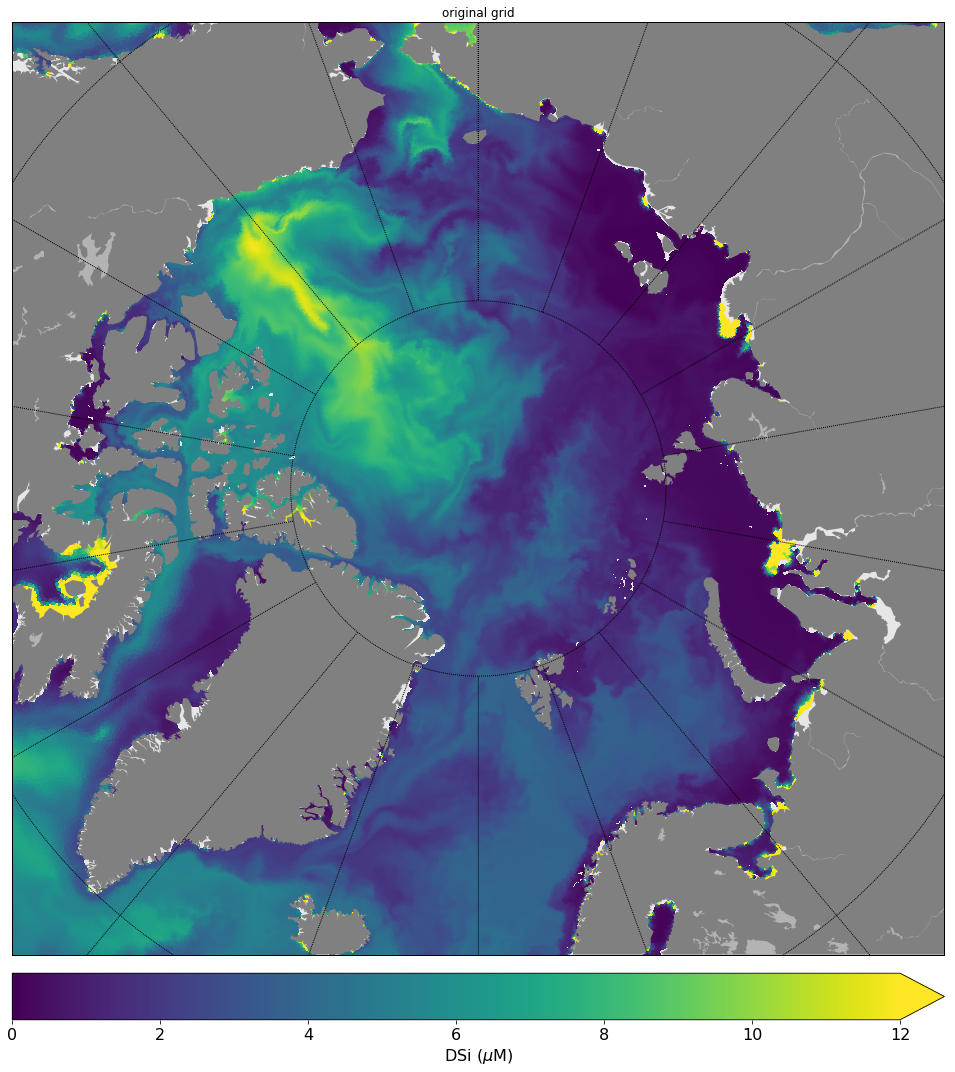

In [11]:
plt.figure(figsize=(15,15))
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]

im = plt.tripcolor(x, y, elem_no_nan, \
              data2, \
              edgecolors='none',\
              lw = 0.01,
             cmap=cmap,
             vmin = 0,
             vmax = 12)

label = 'DSi ($\mu$M)'
cbar=m.colorbar(im,"bottom", size="5%", pad="2%", extend='max')
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16) 
plt.title('original grid')
plt.tight_layout()

loading index...


NameError: name 'pd' is not defined

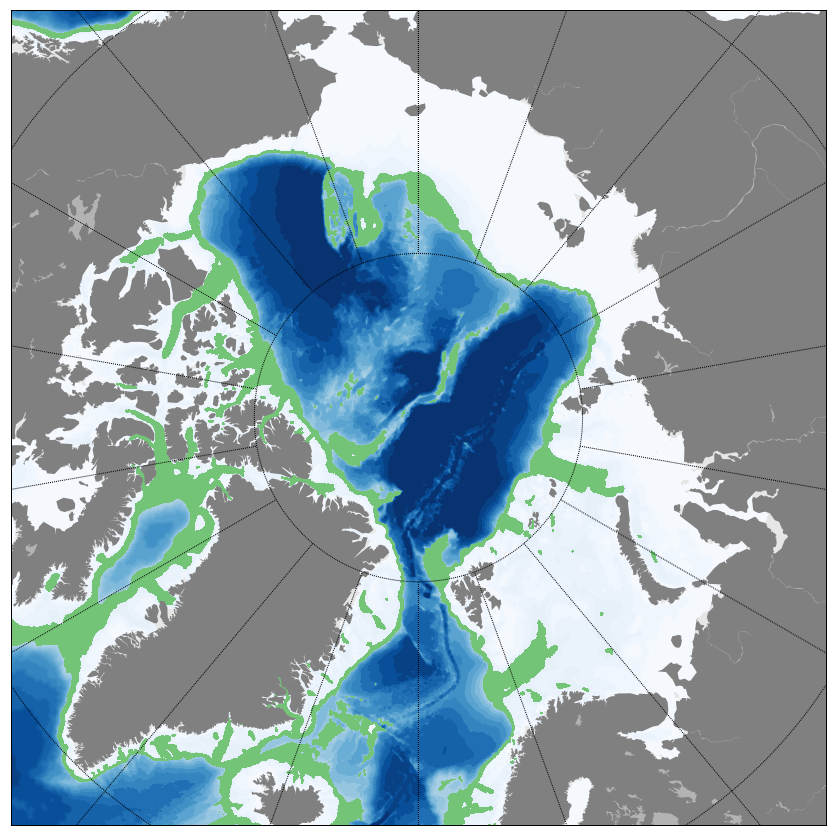

In [12]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(1,1,1)
m.drawmapboundary(fill_color='0.9')
m.fillcontinents(color='.5',lake_color='.7')
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]

# FULL RESOLUTION
# im1 = plt.tripcolor(x, y, elem_no_nan, \
#               mesh.topo, \
#               edgecolors='none',\
#               lw = 0.01,
#              cmap=cm.Blues,
#              vmin = 0,
#              vmax = 3000)

#LOW RES
data2 = np.copy(mesh.topo)
contours = np.arange(0, 4000, 100)
#contours = np.array([0, 50, 100, 150, 200, 300, 400, 500, 750, 1000, 1500, 2000, 3000])
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im1=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cm.Blues, extend='max')

contours = np.arange(350, 1200, 849)
im2 = plt.tricontourf(x, y, elem_no_nan, mesh.topo, levels=[350,1200],cmap=cm.Greens)

#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([350, 1200]),colors='green',linewidths=2)
#plt.tricontour(x, y, elem_no_nan, mesh.topo,levels=([350]),colors='green',linewidths=2)

lo1 = 0
lo2 = 100
la1 = 80
la2 = 83
lons = np.append(np.linspace(lo1, lo2),np.ones(len(np.linspace(la1, la2)))*lo2)
lons = np.append(lons,np.linspace(lo2, lo1))
lons = np.append(lons,np.ones(len(np.linspace(la1, la2)))*lo1)
lats = np.append(np.ones(len(np.linspace(lo1, lo2)))*la1,np.linspace(la1,la2))
lats = np.append(lats,np.ones(len(np.linspace(lo1, lo2)))*la2)
lats = np.append(lats,np.linspace(la2, la1))
#m.plot(lons, lats, color="r", linewidth=4, latlon=True)

print('loading index...')
df = pd.read_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv', delimiter=',',header=0)
print('DONE')

index = df["Unique_ID"]
names = df.Name.unique().tolist()
names.pop(0)
names = sorted(names)
names.append(("All Arctic Ocean (>66N)"))
names

num_id=24

#m.plot(x[df.full_index[index==num_id]],y[df.full_index[index==num_id]],'r.',markersize=.1)



label = 'bathymetry (m)'
cbar=m.colorbar(im1,"bottom", size="5%", pad="2%",extend='max')
cbar.set_label(label, fontsize=16)
cbar.ax.tick_params(labelsize=16)
#plt.title('original grid', fontsize=26)
plt.tight_layout()

#plt.savefig('/home/hbkoziel/pyfesom/figures/'+runid+'/ARCTIC_MAP.png', dpi = 200, bbox_inches='tight')
plt.show()

import GSW seawater routines

In [ ]:
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/python-gsw/')
import gsw

import cmocean cmaps

In [17]:
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean

In [16]:
import pandas as pd
print('loading index...')
df = pd.read_csv('/home/hbkoziel/awi-models/data/mesh/meshArc4.5/bioregion_index_latlon.csv', delimiter=',',header=0)
print('DONE')

index = df["Unique_ID"]
names = df.Name.unique().tolist()
names.pop(0)
names = sorted(names)
names.append(("All Arctic Ocean (>66N)"))
names

loading index...
DONE


['Arctic Ocean -- Atlantic Basin',
 'Arctic Ocean -- Pacific Basin',
 'Baffin Bay',
 'Baffin Bay -- Canadian Shelf',
 'Beaufort Sea - continental coast and shelf',
 'Beaufort-Amundsen-Viscount Melville-Queen Maud',
 'Chukchi Sea',
 'East Greenland Shelf',
 'East Siberian Sea',
 'Eastern Bering Sea',
 'Fram Strait',
 'High Arctic Archipelago',
 'Hudson Complex',
 'Iceland Shelf',
 'Kara Sea',
 'Labrador Sea Basin',
 'Lancaster Sound',
 'Laptev Sea',
 'North Greenland',
 'North and East Barents Sea',
 'Northern Grand Banks - Southern Labrador',
 'Northern Labrador',
 'Northern Norway and Finnmark',
 'Norwegian Sea',
 'West Greenland Shelf',
 'Western Bering Sea',
 'White Sea',
 'All Arctic Ocean (>66N)']

In [18]:
import shapefile as shp
# Import shapefile using geopandas
sf = shp.Reader('/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp')

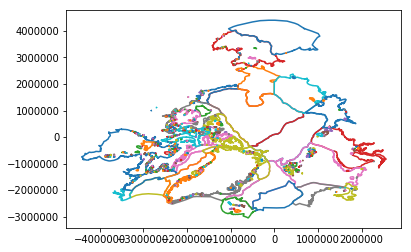

In [20]:
plt.figure()
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y)
plt.show()

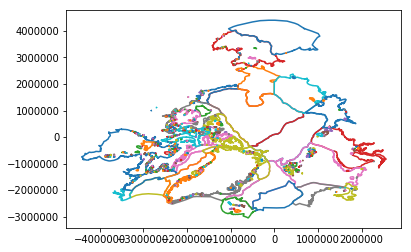

In [21]:
plt.figure()
for shape in sf.shapeRecords():
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y)
plt.show()

In [22]:
#m.readshapefile('/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar','wwf')

In [23]:
#from osgeo import gdal
#from osgeo import ogr

In [26]:
from osgeo import ogr, osr
import os

in_epsg = 9001
out_epsg = 4326
in_shp = '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp'
out_shp = '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/reprojected.shp'

driver = ogr.GetDriverByName('ESRI Shapefile')

# input SpatialReference
inSpatialRef = osr.SpatialReference()
inSpatialRef.ImportFromEPSG(in_epsg)

# output SpatialReference
outSpatialRef = osr.SpatialReference()
outSpatialRef.ImportFromEPSG(out_epsg)

# create the CoordinateTransformation
coordTrans = osr.CoordinateTransformation(inSpatialRef, outSpatialRef)

# get the input layer
inDataSet = driver.Open(in_shp)
inLayer = inDataSet.GetLayer()

# create the output layer
if os.path.exists(out_shp):
    driver.DeleteDataSource(out_shp)
outDataSet = driver.CreateDataSoure(out_shp)
outLayer = outDataSet.CreateLayer('reproject', geom_type=ogr.wkbMultiPolygon)

# add fields
inLayerDefn = inLayer.GetLayerDefn()
for i in range(0, inLayerDefn.GetFieldCount()):
    fieldDefn = inLayerDefn.GetFieldDefn(i)
    outLayer.CreateField(fieldDefn)

# get the output layer's feature definition
outLayerDefn = outLayer.GetLayerDefn()

# loop through the input features
inFeature = inLayer.GetNextFeature()
while inFeature:
    # get the input geometry
    geom = inFeature.GetGeometryRef()
    # reproject the geometry
    geom.Transform(coordTrans)
    # create a new feature
    outFeature = ogr.Feature(outLayerDefn)
    # set the geometry and attribute
    outFeature.SetGeometry(geom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    # add the feature to the shapefile
    outLayer.CreateFeature(outFeature)
    # dereference the features and get the next input feature
    outFeature = None
    inFeature = inLayer.GetNextFeature()

# Save and close the shapefiles
inDataSet = None
outDataSet = None

AttributeError: type object 'object' has no attribute '__getattr__'